<a href="https://colab.research.google.com/github/Rajanikant/ML/blob/master/minset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import h5py

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
#import io
#f = h5py.File('https://drive.google.com/open?id=1MPpbNT3gSanUJwd3KPdszz_pfcWSLopR', 'r')


In [0]:
root_path = 'gdrive/My Drive/ColabNotebooks/SVHN_single_grey1.h5'
f = h5py.File(root_path, 'r')

In [0]:
list(f.keys())

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

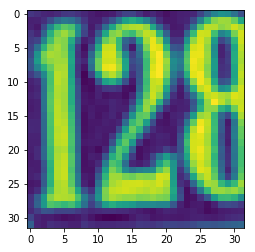

Label:  2


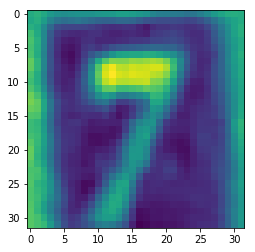

Label:  7


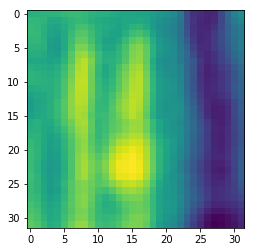

Label:  4


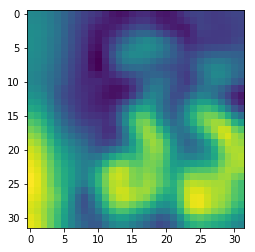

Label:  3


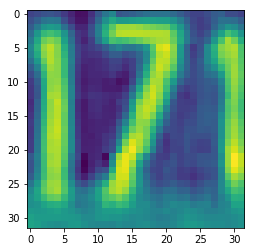

Label:  7


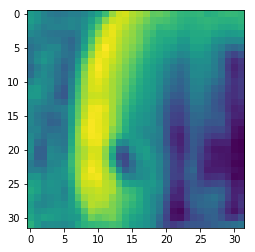

Label:  1


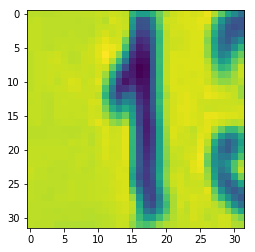

Label:  1


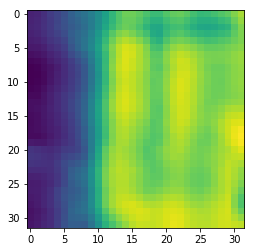

Label:  1


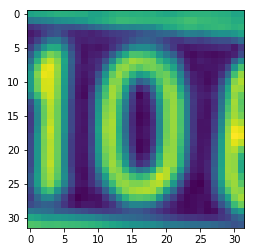

Label:  0


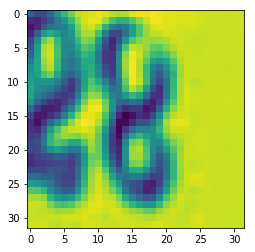

Label:  8


In [0]:
for i in range(0, 20,2):
    plt.imshow(f['X_train'][i])    # show first number in the dataset
    plt.show()
    print('Label: ', f['y_train'][i])

In [0]:
X_train = np.array(f['X_train']).reshape((f['X_train'].shape[0], -1))
X_test = np.array(f['X_test']).reshape((f['X_test'].shape[0], -1))
y_train = np.array(f['y_train']).reshape((f['y_train'].shape[0], -1))
y_test = np.array(f['y_test']).reshape((f['y_test'].shape[0], -1))
X_val = np.array(f['X_val']).reshape((f['X_val'].shape[0], -1))
y_val = np.array(f['y_val']).reshape((f['y_val'].shape[0], -1))

In [0]:
# # normalize inputs from 0-255 to 0-1
train_features = X_train / 255.0
test_features = X_test / 255.0
val_feature = X_val/255.0

print(y_train.shape)
print (y_test.shape)

(42000, 1)
(18000, 1)


In [0]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_val = pd.DataFrame(X_val)
y_val = pd.DataFrame(y_val)

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 1024 entries, 0 to 1023
dtypes: float32(1024)
memory usage: 164.1 MB


In [0]:
kVals = range(1, 30, 2)
accuracies = []
import warnings; 
warnings.simplefilter('ignore')

In [0]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,114.507393,114.593391,114.711784,114.802467,114.889511,114.981987,115.060867,115.160599,115.260262,115.388618,115.541763,115.691254,115.800308,115.799324,115.714890,115.636307,115.607368,115.643906,115.709068,115.718605,115.652718,115.494835,115.245537,114.963837,114.759735,114.570724,114.401535,114.244026,114.176201,114.117203,114.024475,113.984001,114.020164,114.097282,114.167809,114.209846,114.231949,114.237892,114.225143,114.236961,...,112.930573,113.240402,113.472015,113.607468,113.713135,113.780334,113.870140,113.993782,112.836334,112.795715,112.785713,112.770271,112.728989,112.736748,112.849655,112.979294,112.929634,112.692810,112.312675,111.836418,111.353645,110.903191,110.602890,110.460442,110.542336,110.838730,111.299454,111.874596,112.470200,112.977226,113.340187,113.548271,113.688759,113.823586,113.911583,113.983261,114.032356,114.070068,114.184059,114.324036
std,51.137077,51.118355,51.219452,51.331837,51.524326,51.781086,52.061234,52.344265,52.568077,52.669868,52.556377,52.187321,51.586376,50.924419,50.349098,49.957954,49.786613,49.914223,50.329086,50.949432,51.594406,52.100098,52.405926,52.498909,52.358929,52.089462,51.789978,51.499718,51.221546,51.019585,50.885166,50.975941,50.583443,50.571846,50.723652,50.919930,51.215660,51.569126,51.972164,52.330841,...,52.498493,52.104748,51.532295,50.967960,50.523788,50.213406,50.022919,50.168324,50.206505,50.074249,50.244610,50.523476,50.888012,51.307297,51.762409,52.194733,52.379372,52.169167,51.538033,50.568249,49.430431,48.424313,47.686729,47.326363,47.404701,47.874939,48.721142,49.827621,51.031265,51.993778,52.565327,52.722675,52.567211,52.220608,51.732533,51.274834,50.891979,50.617260,50.452549,50.549885
min,4.130600,3.967300,4.771500,4.070500,3.081400,3.092200,3.361600,0.000000,1.938000,2.236900,1.982800,5.113500,2.991800,1.195600,3.081400,4.270700,2.156900,0.228000,3.883900,2.683800,4.172000,3.769900,2.656000,2.428000,2.428000,2.542000,2.292500,2.391200,2.391200,1.793400,3.771600,3.226000,4.195300,4.081300,4.771500,4.070500,2.782500,2.494400,3.209000,0.587000,...,0.228000,0.228000,3.113700,3.672900,2.428000,2.939600,2.989000,4.269000,3.227700,1.482000,3.059800,1.472900,2.885700,3.876000,4.688200,3.847000,3.287800,0.298900,3.306000,4.210600,2.806900,4.554300,3.554400,4.911600,4.916200,4.916200,4.651300,3.585000,4.698900,2.591400,3.990000,3.401800,0.000000,0.114000,3.534000,5.324600,2.428000,2.939600,4.167500,4.383000
25%,74.937826,74.851625,74.927952,74.809378,74.763653,74.525652,74.013248,73.874575,73.313627,73.198673,73.355549,74.067924,75.071377,75.937098,76.443377,76.754427,76.918051,76.925278,76.509449,75.846924,74.966499,73.885727,73

In [0]:
#for k in range(1, 6, 2):
# train the k-Nearest Neighbor classifier with the current value of `k`
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
# evaluate the model and update the accuracies list
score = model.score(X_val, y_val)
print("k=%d, accuracy=%.2f%%" % (1, score * 100))
#accuracies.append(score)

k=1, accuracy=83.78%


In [0]:
predictions = model.predict(X_test)

**Due to system constrent go with n_neighbors = 1. actual code will be below**

for k in range(1, 30, 2):

      # train the k-Nearest Neighbor classifier with the current value of `k`
      model = KNeighborsClassifier(n_neighbors=k)
      model.fit(trainData, trainLabels)
      # evaluate the model and update the accuracies list
      score = model.score(valData, valLabels)
      print("k=%d, accuracy=%.2f%%" % (k, score * 100))
      accuracies.append(score)
find the value of k that has the largest accuracy

i = np.argmax(accuracies)

print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],accuracies[i] * 100))

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import cv2
import matplotlib.pyplot as plt
from skimage import exposure
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

    accuracy                           0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000

Confusion matrix
[[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  610   88  229   82  

In [0]:
score = model.score(X_val, y_val)
print("k=%d, accuracy=%.2f%%" % (30, score * 100))
#accuracies.append(score)

In [0]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.utils.np_utils import to_categorical
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model = Sequential()

In [0]:
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)